In [1]:
import geopandas as gpd 
import pandas as pd 
import numpy as np
import os

In [13]:
replanted_shp = gpd.read_file(r'C:\dev\GIS-270\disturbances_planted\disturbances_planted.gdb')
bio_zones = gpd.read_file(r'C:\dev\GIS-270\input\BEC_BIOGEOCLIMATIC_POLY\BEC_POLY_polygon.shp')

In [18]:
replanted_shp = replanted_shp.drop('index_right', axis=1)

In [17]:
replanted_shp.columns
# bio_zones

Index(['ACTIVITY_TREATMENT_UNIT_ID', 'ACTIVITY_LICENSEE_ID', 'OPENING_ID',
       'MAP_LABEL', 'SILV_BASE_CODE', 'SILV_TECHNIQUE_CODE',
       'SILV_METHOD_CODE', 'SILV_OBJECTIVE_CODE_1', 'SILV_OBJECTIVE_CODE_2',
       'SILV_OBJECTIVE_CODE_3', 'SILV_FUND_SOURCE_CODE', 'ATU_COMPLETION_DATE',
       'ACTUAL_TREATMENT_AREA', 'ACTUAL_TREATMENT_COST',
       'SILVICULTURE_PROJECT_ID', 'FIA_PROJECT_ID',
       'PLANTING_RESULTS_SEQ_NUMBER', 'SILV_TREE_SPECIES_CODE',
       'NUMBER_PLANTED', 'PLANTED_NO_BEYOND_XFER_LIMIT', 'SEEDLOT_NUMBER',
       'VEG_LOT_ID', 'REQUEST_SKEY', 'GENETIC_CLASS_CODE',
       'SUPERIOR_PROVIDENCE_IND', 'REGISTERED_SEED_IND', 'GEOMETRY_EXIST_IND',
       'FEATURE_AREA', 'FEATURE_PERIMETER', 'CAPTURE_METHOD_CODE',
       'DATA_SOURCE_CODE', 'OBSERVATION_DATE', 'DATA_QUALITY_COMMENT',
       'ATU_WHO_CREATED', 'ATU_WHEN_CREATED', 'ATU_WHO_UPDATED',
       'ATU_WHEN_UPDATED', 'FEATURE_CLASS_SKEY', 'FEATURE_AREA_SQM',
       'FEATURE_LENGTH_M', 'SE_ANNO_CAD_DATA', 'G

In [19]:
thing = replanted_shp.sjoin(bio_zones[['geometry', 'ZONE']], predicate='within')
thing

,ACTIVITY_TREATMENT_UNIT_ID,ACTIVITY_LICENSEE_ID,OPENING_ID,MAP_LABEL,SILV_BASE_CODE,SILV_TECHNIQUE_CODE,SILV_METHOD_CODE,SILV_OBJECTIVE_CODE_1,SILV_OBJECTIVE_CODE_2,SILV_OBJECTIVE_CODE_3,...,FEATURE_LENGTH_M,SE_ANNO_CAD_DATA,GEOMETRY_AREA,GEOMETRY_LEN,fme_feature_type,raster_val,disturbance_type,geometry,index_right,ZONE
0,538478,None,35268,FDI 1500(1990),PL,PL,None,CE,None,None,...,809.0629,None,0.0,0.0,WHSE_FOREST_VEGETATION.RSLT_PLANTING_SVW,2007.0,harvest,"MULTIPOLYGON (((1299935.859 833102.545, 129994...",5443,ICH
3,1610938,PlantingTU_id=1822,99449,SX 36000(2003),PL,PL,None,None,None,None,...,5265.2189,None,0.0,0.0,WHSE_FOREST_VEGETATION.RSLT_PLANTING_SVW,2003.0,harvest,"MULTIPOLYGON (((1199034.175 1078793.43, 119905...",5298,SBS
5,1610940,PlantingTU_id=1825,72006,PLI 41840(2003),PL,PL,None,None,None,None,...,7042.7719,None,0.0,0.0,WHSE_FOREST_VEGETATION.RSLT_PLANTING_SVW,2017.0,harvest,"MULTIPOLYGON (((1191917.249 1082264.745, 11919...",9236,SBS
6,1610941,PlantingTU_id=1826,72006,SX 8100(2003),PL,PL,None,None,None,None,...,1965.2272,None,0.0,0.0,WHSE_FOREST_VEGETATION.RSLT_PLANTING_SVW,2016.0,harvest,"MULTIPOLYGON (((1192216.71 1082226.65, 1192217...",9236,SBS
7,1610942,PlantingTU_id=1827,72006,SX 30880(2003),PL,PL,None,None,None,None,...,6134.1592,None,0.0,0.0,WHSE_FOREST_VEGETATION.RSLT_PLANTING_SVW,2016.0,harvest,"MULTIPOLYGON (((1192589.513 1082326.55, 119259...",9236,SBS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15558,4123682,1005103013,1724116,FDI 4680(2024),PL,PL,CTAIN,CE,None,None,...,8683.9024,None,0.0,0.0,WHSE_FOREST_VEGETATION.RSLT_PLANTING_SVW,2018.0,fire,"MULTIPOLYGON (((1801104.7 527585.6, 1801105.6 ...",51,MS
15559,4123692,1005103176,1726669,LW 3240(2024),PL,RP,CTAIN,CE,None,None,...,5019.1266,None,0.0,0.0,WHSE_FOREST_VEGETATION.RSLT_PLANTING_SVW,2019.0,fire,"MULTIPOLYGON (((1848844.7 528823.2, 1848849.8 ...",54,MS
15560,4123700,1005096461,1724113,LW 6480(2024),PL,PL,CTAIN,CE,None,None,...,3054.9125,None,0.0,0.0,WHSE_FOREST_VEGETATION.RSLT_PLANTING_SVW,2018.0,fire,"MULTIPOLYGON (((1802753.6 531954.8, 1802755.3 ...",2959,ICH
15561,4123702,1005098561,1724118,FDI 1575(2024),PL,PL,CTAIN,CE,None,None,...,2315.5740,None,0.0,0.0,WHSE_FOREST_VEGETATION.RSLT_PLANTING_SVW,2018.0,fire,"MULTIPOLYGON (((1802215.9 530647.6, 1802217 53...",2959,ICH


In [4]:
# bc = pd.read_csv('../../processing/bc_avg.csv').dropna()
# replanted = pd.read_csv('../../processing/disturbances_planted.csv').dropna()
harvest = pd.read_csv('../../processing/harvest_not_planted.csv').dropna()
# fire = pd.read_csv('../../processing/fire_not_planted.csv').dropna()

In [15]:
harvest.to_csv('../../processing/harvest_not_planted_simplified.csv')

In [ ]:
from datetime import timedelta

def make_date(df): 
    df['date'] = pd.to_datetime(df['date'])
    return df

def days_after(df, ref_shp, shp_id):
    shp = gpd.read_file(ref_shp)
    shp['effective_date'] = pd.to_datetime(shp['raster_val'].astype(int) + 1, format='%Y')
    ndvi_effected = df.set_index('ID').merge(shp.set_index(shp_id), left_index=True, right_index=True).drop('geometry', axis=1)
    ndvi_effected['time_delta'] = pd.to_datetime(ndvi_effected['date']) - ndvi_effected['effective_date']
    return ndvi_effected.reset_index().groupby(['ZONE', 'time_delta']).mean(numeric_only=True).reset_index()

def calculate_correlation(df, column_label):
    x = np.array([td.days for td in df.index])
    y = np.array(list(df[column_label]))

    x_f = x[(~np.isnan(list(df[column_label]))) & (x > 0)]
    y_f = y[(~np.isnan(list(df[column_label]))) & (x > 0)]

    m, b = np.polyfit(x_f, y_f, 1)

    return pd.DataFrame({'ZONE': column_label, 'm': m, 'b': b}, index=[0])


def calculate_correlations(days_after, out):    
    pivot = days_after.pivot(index='time_delta', columns='ZONE', values='MedianValue')

    return pd.concat([calculate_correlation(pivot, column) for column in pivot.columns])

def split_planted_disturbances(replanted_csv, replanted_shp):
    replanted = pd.read_csv(replanted_csv).dropna()
    replanted_geo = gpd.read_file(replanted_shp)

    if 'index_right' in replanted_geo.columns:
        replanted_geo = replanted_geo.drop('index_right', axis=1)

    replanted_merge = replanted.merge(replanted_geo[['ACTIVITY_TREATMENT_UNIT_ID', 'disturbance_type']], left_on='ID', right_on='ACTIVITY_TREATMENT_UNIT_ID')
    fire = replanted_merge[replanted_merge['disturbance_type'] == 'fire']
    harvest = replanted_merge[replanted_merge['disturbance_type'] == 'harvest']
    print(fire)
    print(harvest)
    fire.to_csv('../../processing/fire_planted.csv')
    harvest.to_csv('../../processing/harvest_planted.csv')
    


In [47]:
split_planted_disturbances(r'C:\dev\GIS-270\processing\disturbances_planted.csv', r'C:\dev\GIS-270\processing\planted_ecozone.gdb')

         Unnamed: 0       ID  MinValue  MaxValue  MeanValue  MedianValue  \
40              355  1864433  0.673547  0.685777   0.678901     0.677379   
41              361  1905361  0.529718  0.767984   0.683940     0.719030   
51              498  2082121  0.298337  0.481355   0.389846     0.389846   
53              508  2129481  0.616385  0.645875   0.631130     0.631130   
55              517  2154338  0.346123  0.458874   0.402878     0.403636   
...             ...      ...       ...       ...        ...          ...   
1923862       11465  4121430  0.317422  0.409449   0.355553     0.347670   
1923863       11466  4121456  0.284254  0.352039   0.323608     0.321525   
1923864       11478  4121728  0.226027  0.594046   0.410037     0.410037   
1923865       11487  4122230  0.332741  0.349455   0.341098     0.341098   
1923866       11496  4122518  0.343750  0.398889   0.384197     0.389851   

         StdevValue  CountValue        date  ACTIVITY_TREATMENT_UNIT_ID  \
40         0

In [21]:
harvest_after = days_after(harvest, r'C:\dev\GIS-270\processing\harvest_not_planted_ecozone\harvest_not_planted_ecozone.gdb', 'ID')

In [35]:
calculate_correlations(harvest_after)

,ZONE,m,b
0,BWBS,0.000015,0.559468
0,CDF,0.000015,0.678908
0,CWH,0.000021,0.667497
0,ESSF,0.000027,0.473049
0,ICH,0.000019,0.584908
0,IDF,0.000016,0.530866
0,IMA,0.000035,-0.056387
0,MH,0.000021,0.554662
0,MS,0.000028,0.479155
0,PP,-0.000004,0.531369


In [37]:
fire_after = days_after(harvest, r'C:\dev\GIS-270\processing\fire_not_planted_ecozone\fire_not_planted_ecozone.gdb', 'ID')

In [38]:
calculate_correlations(fire_after)

,ZONE,m,b
0,BAFA,1.132748e-05,0.642597
0,BG,1.253821e-05,0.640090
0,BWBS,9.148788e-06,0.622259
0,CDF,6.401164e-06,0.669429
0,CMA,1.289201e-06,0.641451
0,CWH,9.695766e-07,0.625902
0,ESSF,3.430741e-06,0.621170
0,ICH,7.521614e-06,0.616792
0,IDF,1.073072e-05,0.607113
0,IMA,8.997595e-06,0.622718


In [24]:
shp = gpd.read_file(r'C:\dev\GIS-270\processing\fire_not_planted_ecozone/fire_not_planted_ecozone.gdb')
shp

,raster_val,ID,index_right,ZONE,geometry
0,2019.0,0.0,13455.0,BAFA,"MULTIPOLYGON (((291785.052 1717118.746, 291812..."
1,2014.0,1.0,12769.0,SWB,"MULTIPOLYGON (((313087.865 1724064.163, 313141..."
2,2011.0,2.0,3931.0,SWB,"MULTIPOLYGON (((313972.263 1722861.203, 313999..."
3,2005.0,3.0,3940.0,SWB,"MULTIPOLYGON (((320157.825 1725148.343, 320350..."
4,2016.0,4.0,3931.0,SWB,"MULTIPOLYGON (((315015.957 1721499.567, 315166..."
...,...,...,...,...,...
40098,2018.0,48009.0,9710.0,ESSF,"MULTIPOLYGON (((1853589.003 518131.403, 185364..."
40099,2018.0,48010.0,9710.0,ESSF,"MULTIPOLYGON (((1852389.33 516114.482, 1852496..."
40100,2018.0,48012.0,9710.0,ESSF,"MULTIPOLYGON (((1860489.373 519200.326, 186054..."
40101,2019.0,48013.0,9710.0,ESSF,"MULTIPOLYGON (((1865509.712 520124.524, 186557..."


In [25]:
shp['effective_date'] = pd.to_datetime(shp['raster_val'].astype(int) + 1, format='%Y')

In [22]:
shp = shp.drop('date', axis=1)

In [26]:
shp.set_index('ID')

,raster_val,geometry,effective_date
ID,,,
0,2019.0,"POLYGON ((291785.052 1717118.746, 291812.067 1...",2020-01-01
1,2014.0,"POLYGON ((313087.865 1724064.163, 313141.929 1...",2015-01-01
2,2011.0,"POLYGON ((313972.263 1722861.203, 313999.295 1...",2012-01-01
3,2005.0,"POLYGON ((320157.825 1725148.343, 320350.129 1...",2006-01-01
4,2016.0,"POLYGON ((315015.957 1721499.567, 315166.157 1...",2017-01-01
...,...,...,...
48012,2018.0,"POLYGON ((1860489.373 519200.326, 1860542.989 ...",2019-01-01
48013,2019.0,"POLYGON ((1865509.712 520124.524, 1865576.882 ...",2020-01-01
48014,2019.0,"POLYGON ((1860701.4 516856.021, 1860755.013 51...",2020-01-01


In [43]:
ndvi_effected = fire.set_index('ID').merge(shp.set_index('ID'), left_index=True, right_index=True).drop('geometry', axis=1)

In [60]:
ndvi_effected['time_delta'] = pd.to_datetime(ndvi_effected['date']) - ndvi_effected['effective_date']
ndvi_effected

,Unnamed: 0,MinValue,MaxValue,MeanValue,MedianValue,StdevValue,CountValue,date,raster_val,effective_date,time_delta
ID,,,,,,,,,,,
0,0,0.000000,1.000000,0.499725,0.509540,0.182870,845163.0,2003-03-17,2019.0,2020-01-01,-6134 days
12781,4910,0.695252,0.827312,0.761282,0.761282,0.093380,2.0,2003-03-17,2014.0,2015-01-01,-4308 days
12896,4952,0.365195,0.502820,0.434007,0.434007,0.097315,2.0,2003-03-17,2014.0,2015-01-01,-4308 days
13270,5082,0.406467,0.620285,0.513376,0.513376,0.151191,2.0,2003-03-17,2010.0,2011-01-01,-2847 days
14825,5702,0.333594,0.560650,0.435724,0.412927,0.115232,3.0,2003-03-17,2006.0,2007-01-01,-1386 days
...,...,...,...,...,...,...,...,...,...,...,...
47768,19312,0.347498,0.363873,0.357323,0.363873,0.008969,5.0,2024-10-28,2018.0,2019-01-01,2127 days
47778,19318,0.126918,0.498056,0.322896,0.308866,0.084353,32.0,2024-10-28,2018.0,2019-01-01,2127 days
47824,19336,0.047051,0.657431,0.316831,0.313200,0.245113,6.0,2024-10-28,2013.0,2014-01-01,3953 days


In [26]:
from datetime import timedelta
from unicodedata import numeric


ndvi_effected.groupby('time_delta').mean(numeric_only=True)['MedianValue'].plot()
days_after(fire, r'C:\dev\GIS-270\processing\harvest_not_planted_ecozone\harvest_not_planted_ecozone.gdb', 'ID').groupby('time_delta').mean(numeric_only=True)['MedianValue'].plot()

NameError: name 'ndvi_effected' is not defined

In [5]:
test = days_after(harvest, r'C:\dev\GIS-270\processing\harvest_not_planted_ecozone\harvest_not_planted_ecozone.gdb', 'ID').groupby(['ZONE', 'time_delta']).mean(numeric_only=True).reset_index()

c:\dev\GIS-270\.venv\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: organizePolygons() received a polygon with more than 100 parts. The processing may be really slow.  You can skip the processing by setting METHOD=SKIP, or only make it analyze counter-clock wise parts by setting METHOD=ONLY_CCW if you can assume that the outline of holes is counter-clock wise defined
  return ogr_read(


[  74   75   76 ... 7592 7599 7606] [0.4283297  0.36112853 0.3348426  ... 0.58708337 0.64051977 0.63247457]
1.8877103053217495e-05 0.5849080374351153


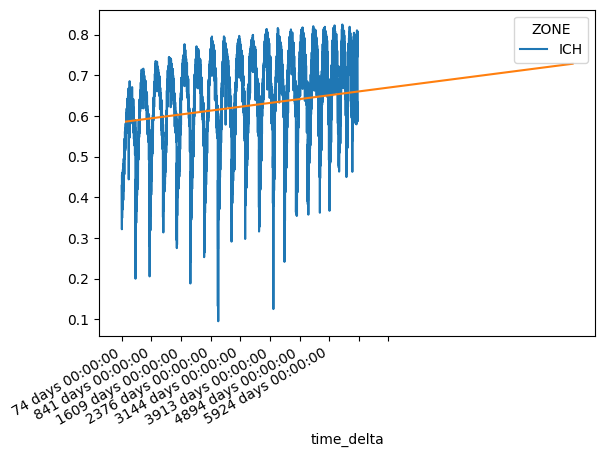

In [14]:
import matplotlib.pyplot as plt
from datetime import timedelta


pivot = test.pivot(index='time_delta', columns='ZONE', values='MedianValue')

x = np.array([td.days for td in pivot.index])
y = np.array(list(pivot['ICH']))

x_f = x[(~np.isnan(list(pivot['ICH']))) & (x > 0)]
y_f = y[(~np.isnan(list(pivot['ICH']))) & (x > 0)]

print(x_f, y_f)

m, b = np.polyfit(x_f, y_f, 1)

pivot[['ICH']][pivot.index > timedelta(0)].plot()
plt.plot(x_f, m*x_f + b)
print(m,b)

In [ ]:
x = np.array([td.days for td in pivot.index])
y = np.array(list(pivot['ICH']))

x_f = x[(~np.isnan(list(pivot['ICH']))) & (x > 0)]
y_f = y[(~np.isnan(list(pivot['ICH']))) & (x > 0)]

print(x_f, y_f)

np.polyfit(x_f, y_f, 1)

[  74   75   76 ... 7592 7599 7606] [0.43275467 0.36112876 0.33840659 ... 0.58471514 0.63957902 0.63066396]


array([1.82641950e-05, 5.86522772e-01])

In [ ]:
np.isnan(list(pivot['ICH']))

array([False, False, False, ..., False, False, False])

<Axes: xlabel='time_delta'>

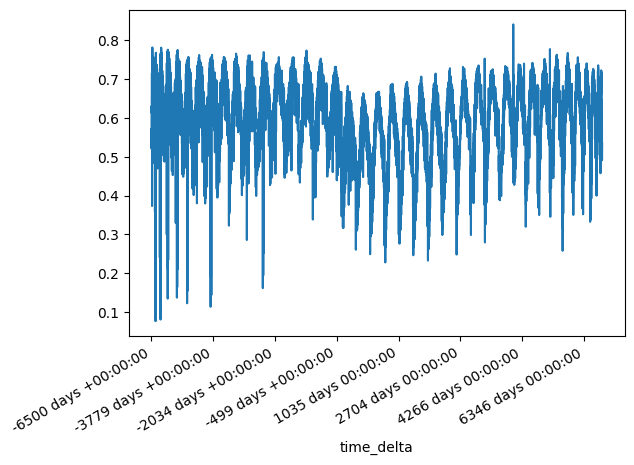

In [29]:
days_after(replanted, r'C:\dev\GIS-270\disturbances_planted\disturbances_planted.gdb', 'ACTIVITY_TREATMENT_UNIT_ID').groupby('time_delta').mean(numeric_only=True)['MedianValue'].plot()